<a href="https://colab.research.google.com/github/mirpouya/Pytorch_Tutorial/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Work flow
* ## getting the data ready
* ## turn the data into tensors
* ## build or pick a pretrained model
  1. pick a loss function and optimizer
  2. build a training loop
* ## fit the model to the data to make prediction
* ## evaluate the model
* ## improve through experimentation
* ## save and reload the trained model

In [1]:
import torch
from torch import nn # nn contains all of pytorch's neural network's building blocks 
import matplotlib.pyplot as plt

# checkout pytorch version
torch.__version__

'2.0.1+cu118'

## 1. Data(preparing and loading)

In [2]:
# generating some linear regressoin data

# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

In [3]:
torch.arange(start, end, step).unsqueeze(dim=1).shape

torch.Size([50, 1])

In [4]:
# splitting the data into test and train

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
# a function for plotting predictions

def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=None):
  """
  plots training data, test data, and compares predictions
  """
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    # plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the ledgend
  plt.legend(prop={"size":14})


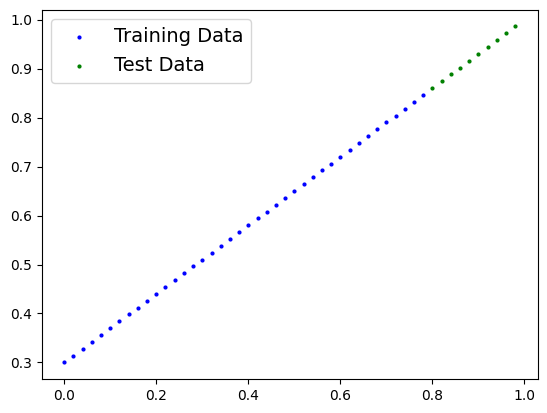

In [6]:
plot_predictions()

## 2. Build model

In [7]:
# create linear regression model class

class LinearRegressionModel(nn.Module): 
  # almost everything in PyTorch inherits from nn.Module

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
    # Forward method to define the computation in the model
    # any subclass of nn.Module needs to override forward()
    # forward method is in the __init__
  def forward(self, x: torch.Tensor) -> torch.Tensor: 
  # "x" is the input data, with Tensor type, expect to return a Tensor
    return self.weights * x + self.bias

## PyTorch model building essentials

* <b> torch.nn:  </b> contains all of the building blocks for computational graphs
* <b> torch.nn.Parameter: </b> what parameters should our model try and learn
* <b> torch.nn.Module: </b> the base class for all neural network modules, if you subclass it, you should override forward( )
* <b> torch.optim: </b> this is where optimizers in PyTorch live, they will help with gradient descent.
* <b> def forward(): </b> all nn.Module subclasses require you to override forward(), this method defines what happens in the forward computation

In [8]:
# create a random seed
torch.manual_seed(42)

# create an instance of our model
model_0 = LinearRegressionModel()

# checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# list mame parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias

(0.7, 0.3)

## Making predictions using "torch.inference_mode( )"

In [11]:
# make predictions with model
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

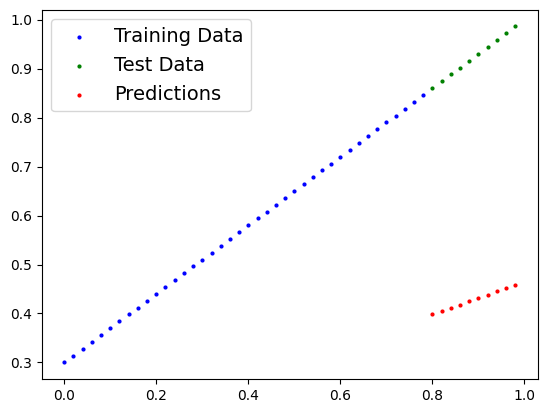

In [12]:
# visualize predictions with plot_predictions function

plot_predictions(predictions=y_pred)

## 3. <b> Training the model </b>

Things we need to train the model:

1. <b> Loss function: </b> 
   measures how wrong your model's predictions are

2. <b> Optimizer: </b>
   takes into account the loss of a model and adjust the model's parameters

specifically for PyTorch, we need a <b> Training Loop </b> and a <b> Testing Loop </b>

In [13]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

### <b> Building a training loop and a testing loop </b>

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (data moving through model's forward()) -> forward propagation
2. calculate the loss
3. Optimizer zero grad
4. Loss backward - move backward to calculate the gradients of all the parameters we need with repect to the loss
5. Optimizer step - adjust model parameters to improve the loss

In [14]:
# each epock is one loop through the data
epochs = 1

# 0. loop throught the data
for epoch in range(epochs):
  # set the model to training mode
  # train mode in PyTorch tracks all parameters that requires_gradients 
  model_0.train()

  # 1. forward pas
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss 
  #    with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer
  optimizer.step()

  model_0.eval() # turns off gradient tracking

In [15]:
# training loop
torch.manual_seed(42)

epochs = 1

for epoch in range(epochs):

  # 0. set the model to training mode -> it allows gradient tracking
  model_0.train()

  # 1. forward pass to calculate y_prediction
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print the loss
  print(f"Loss: {loss}")

  # 3. zero out previous gradients
  optimizer.zero_grad()

  # 4. backpropagation to calculate gradients
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # 6. Testing
  model_0.eval()

Loss: 0.3013603389263153


In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])

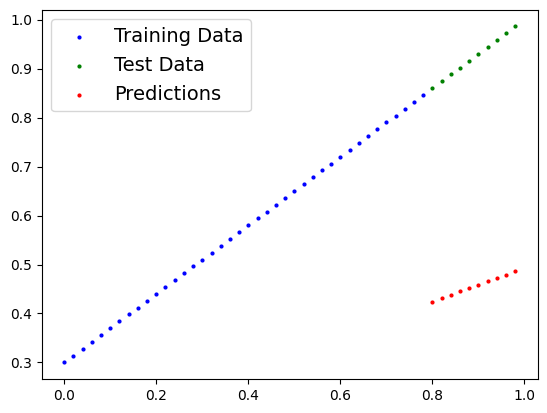

In [17]:
# visualizing prediction afte 10 epochs

with torch.inference_mode():
  y_pred = model_0(X_test)

plot_predictions(predictions=y_pred)

epoch: 0 | loss: 0.28983935713768005 | test loss: 0.4541231691837311

OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
epoch: 5 | loss: 0.23223432898521423 | test loss: 0.3867681920528412

OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
epoch: 10 | loss: 0.1746293306350708 | test loss: 0.3194132149219513

OrderedDict([('weights', tensor([0.3874])), ('bias', tensor([0.2588]))])
epoch: 15 | loss: 0.11702437698841095 | test loss: 0.2520582973957062

OrderedDict([('weights', tensor([0.4069])), ('bias', tensor([0.3088]))])
epoch: 20 | loss: 0.07638873159885406 | test loss: 0.19773726165294647

OrderedDict([('weights', tensor([0.4258])), ('bias', tensor([0.3463]))])
epoch: 25 | loss: 0.05845819041132927 | test loss: 0.16037428379058838

OrderedDict([('weights', tensor([0.4425])), ('bias', tensor([0.3688]))])
epoch: 30 | loss: 0.05069301277399063 | test loss: 0.13647659122943878

OrderedDict([('weights', tensor([0.4564])), ('bias', tensor([0.38

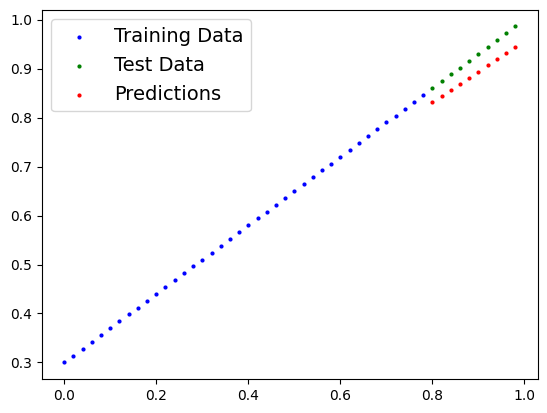

In [18]:
# completing testing phase of loop

torch.manual_seed(42)

epochs = 125

for epoch in range(epochs):

  # 0. train mode
  model_0.train()

  # 1. forward pass - calculate y_pred for training set
  y_pred = model_0(X_train)

  # 2. calculate loss
  loss = loss_fn(y_pred, y_train)
  # print loss
  #print(f"Loss in epoch {epoch} is {loss}")

  # 3. zero out gradients
  optimizer.zero_grad()

  # 4. backward pass - calculate gradients
  loss.backward()

  # 5. optimizer step
  optimizer.step()


  ########## Testing mode ############
  
  # 0. test mode: turns off settings in the model not needed for test phase
  # such as dropout, batch normalization,...
  model_0.eval()

  # 1. making inference
  # turns off gradient tracking and couple more things
  with torch.inference_mode():
    # 1. do the forward pass - calculate y_pred for test
    test_pred = model_0(X_test)

    # 2. calculate the test loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 5 == 0:
    print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}\n")
    print(model_0.state_dict())

with torch.inference_mode():
  y_test_hat = model_0(X_test)

plot_predictions(predictions=y_test_hat)

In [19]:
# completing training loop, visualize loss values

torch.manual_seed(42)

model_1 = LinearRegressionModel()

model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
loss_fn = nn.L1Loss()

# setup an optimizer for model 1
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [21]:
# complete training loop
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  # 0. train mode
  model_1.train()

  # 1. forward pass to get predictions
  y_train_pred = model_1(X_train)

  # 2. calculate loss
  loss = loss_fn(y_train_pred, y_train)
  # append to loss_values list
  loss_values.append(loss)

  # 3. reset gradients
  optimizer.zero_grad()

  # 4. backpropagation - calculate gradients
  loss.backward()

  # 5. optimizer step
  optimizer.step()


  ########### Test mode ##########

  # 0. test mode
  model_1.eval()

  # 1. inference mode - turn off gradient tracking
  with torch.inference_mode():
    y_test_pred = model_1(X_test)

    loss_test = loss_fn(y_test_pred, y_test)
    test_loss_values.append(loss_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    print(f"epoch: {epoch} | loss: {loss} | test loss: {loss_test}\n")
    print(model_1.state_dict())

epoch: 0 | loss: 0.31288138031959534 | test loss: 0.48106518387794495

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch: 10 | loss: 0.1976713240146637 | test loss: 0.3463551998138428

OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch: 20 | loss: 0.08908725529909134 | test loss: 0.21729660034179688

OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch: 30 | loss: 0.053148526698350906 | test loss: 0.14464017748832703

OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch: 40 | loss: 0.04543796554207802 | test loss: 0.11360953003168106

OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch: 50 | loss: 0.04167863354086876 | test loss: 0.09919948130846024

OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch: 60 | loss: 0.03818932920694351 | test loss: 0.08886633068323135

OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

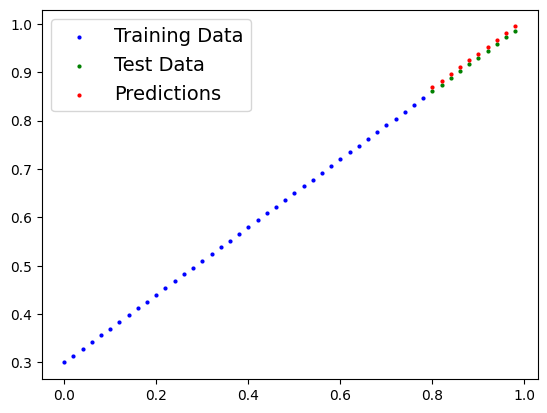

In [22]:
# visualize predictions

with torch.inference_mode():
  y_test_pred = model_1(X_test)

plot_predictions(predictions=y_test_pred)

RuntimeError: ignored

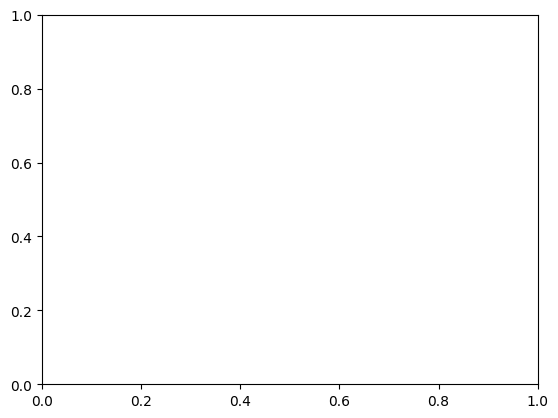

In [24]:
# plot the loss curves

plt.plot(range(200), loss_values, label="Train loss")
plt.plot(range(200), test_loss_values, label="Test loss")

plt.legend();

In [25]:
# we have to chenge our numbers from tensor to numpy arrays!

In [26]:
import numpy as np

np.array(torch.tensor(loss_values).cpu().numpy())

array([0.31288138, 0.30136034, 0.28983936, 0.27831835, 0.26679736,
       0.25527635, 0.24375534, 0.23223433, 0.22071333, 0.20919232,
       0.19767132, 0.18615034, 0.17462933, 0.16310832, 0.15158734,
       0.14006636, 0.12854536, 0.11702438, 0.10609122, 0.09681284,
       0.08908726, 0.08227583, 0.07638873, 0.07160007, 0.06747635,
       0.06395438, 0.06097005, 0.05845819, 0.05635259, 0.05458578,
       0.05314853, 0.05181945, 0.05069301, 0.04982285, 0.04895269,
       0.04819351, 0.04753182, 0.04692793, 0.04642332, 0.04591871,
       0.04543797, 0.04503796, 0.04463796, 0.04423796, 0.04383796,
       0.04343796, 0.04307463, 0.04272563, 0.04237663, 0.04202763,
       0.04167863, 0.04132963, 0.04098063, 0.04063163, 0.04028264,
       0.03993364, 0.03958464, 0.03923564, 0.03888664, 0.03853764,
       0.03818933, 0.03785244, 0.03750344, 0.03716412, 0.03681822,
       0.03647511, 0.03613304, 0.0357861 , 0.03544784, 0.03509884,
       0.0347609 , 0.03441364, 0.03407188, 0.03372844, 0.03338

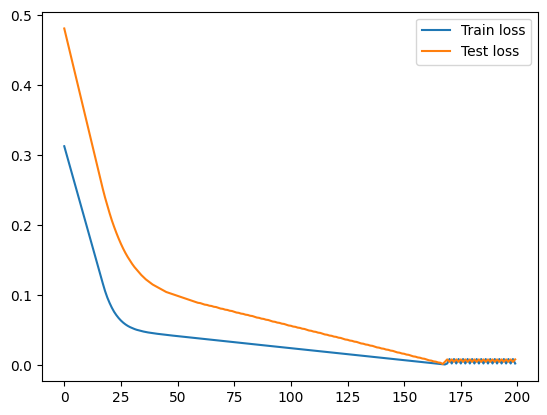

In [27]:
plt.plot(range(200), np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(range(200), np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Test loss")

plt.legend();

## <b> Saving a model in PyTorch </b>

### Three main methods for saving and loading models in PyTorch

1. `torch.save()` - allows you save a PyTorch object in python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary

In [28]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
# saving our PyTorch model
from pathlib import Path # dealing with files paths

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model saved path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"    # PyTorch objects usually have the pth extention

MODEL_SAVED_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVED_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [30]:
# JOOOOON!

#### Save the model `state_dict()`, since it's the recommended method

syntax: `torch.save(model.state_dict(), PATH)`

In [31]:
print(f"saving model to: {MODEL_SAVED_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVED_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [32]:
# check models
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Jun  3 09:36 01_pytorch_workflow_model_0.pth


#### Saving our PyTorch model:

In [33]:
# 0. import pathlib to make paths
from pathlib import Path

# 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MDEOL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [34]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Jun  3 10:19 01_pytorch_workflow_model_0.pth


### <b> Loading a PyTorch model </b>

Since we saved our model's `state_dict()` rather than the model itself, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [36]:
load_model_1 = LinearRegressionModel()
print(f"load_model_1 parameters befor assigning state_dict: \n{load_model_1.state_dict()}\n\n")

# load the saved `state_dict()`
load_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

load_model_1 parameters befor assigning state_dict: 
OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])




<All keys matched successfully>

In [37]:
load_model_1.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## <b> Put it all together </b>
### Do everything we'done for another time!

In [63]:
# import required libraries

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np 
# check torch version
torch.__version__

'2.0.1+cu118'

create device-agnostic code.

This means if we've got access to a GPU, our code will use it

In [64]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using devive: {device}")

# if I set google colab runtime to gpu, the device will be cuda

Using devive: cuda


In [65]:
# check the gpu
!nvidia-smi

Sat Jun  3 13:45:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    29W /  70W |    821MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## <b> Data </b>

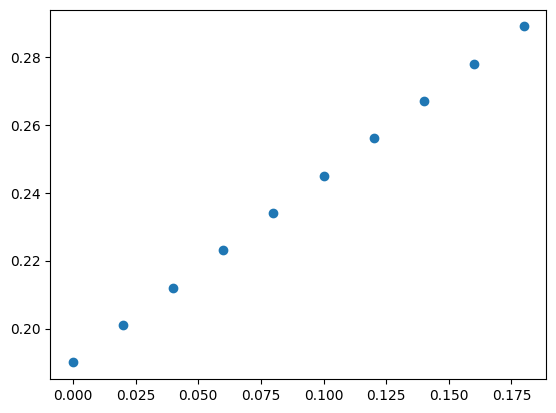

In [66]:
# generate some data using a linear regression model

weight = 0.55
bias = 0.19

# create range value
start = 0
end = 2
step = 0.02

# create X, y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

plt.scatter(X[:10].numpy(), y[:10].numpy())

In [67]:
# split train and test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"train split size: {X_train.size()}")
print(f"test split size: {X_test.size()}")

train split size: torch.Size([80, 1])
test split size: torch.Size([20, 1])


In [68]:
# re_create plot_prediction function

def plot_predictions(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     predictions=None):
  # plot train data
  plt.scatter(X_train, y_train, c="b", s=3, label="Train data")
  # plot test data
  plt.scatter(X_test, y_test, c="g", s=3, label="Test data")
  #plot predictions

  if predictions is not None:
    plt.scatter(X_test, predictions, c="r", s=3, label="Predictions")
  
  # show the ledgend
  plt.legend(prop={"size":10})

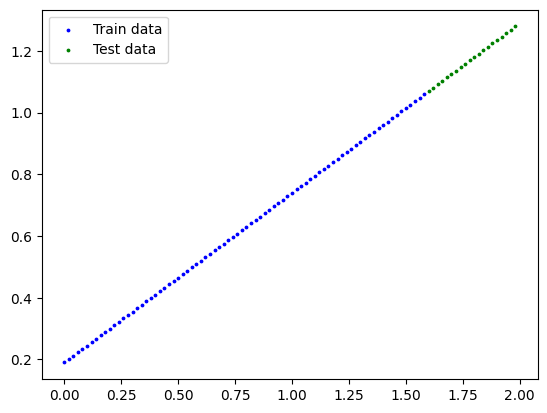

In [69]:
# plot our data
plot_predictions(X_train, y_train, X_test, y_test)

## <b> Building the Model </b>

In [70]:
class LinearRegressionModel_2(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                          requires_grat=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
  # override forward methor
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

<b> IMPORTANT - </b> most of the time, we initialize layers instead of weights, now I want to implement layer specification approach

I use `nn.Linear()` for weights

In [71]:
class LinearRegressionModel_L(nn.Module):
  def __init__(self):
    super().__init__()

    # use nn.Linear()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)  # input of size 1 and output of size 1                
    
  # override forward methor
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [72]:
# set the manual seed
torch.manual_seed(42)

model_L = LinearRegressionModel_L()
model_L.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [73]:
# train the model

# set the model to use the target device
device

'cuda'

In [74]:
# check what device parameters are using at the moment
next(model_L.parameters()).device

device(type='cpu')

In [75]:
# set the model to use the target device
model_L.to(device)

next(model_L.parameters()).device

device(type='cuda', index=0)

## <b> Training phase </b>

In [76]:
# we need a loss function
# an optimizer
# training loop

# setup loss functin
loss_fn = nn.L1Loss()

# setup optimizer
optimizer = torch.optim.SGD(params = model_L.parameters() , lr=0.01)

In [77]:
# training loop

torch.manual_seed(42)

epochs = 240

for epoch in range(epochs):

  epoch_count = []
  train_loss_values = []
  test_loss_values = []

  # model on train mode
  model_L.train()

  # forward pass - y_pred
  y_train_pred = model_L(X_train)

  # loss
  loss_train = loss_fn(y_train_pred, y_train)

  # zero gradients
  optimizer.zero_grad()

  # backpropagation - gradients
  loss_train.backward()

  # optimizer step
  optimizer.step()


  ######## test mode #######

  model_L.eval()

  with torch.inference_mode():  # no need to track gradients
    y_test_pred = model_L(X_test)
    loss_test = loss_fn(y_test_pred, y_test)

  # print what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    print(f"epoch: {epoch} | loss: {loss} | test loss: {loss_test}\n")
    print(model_1.state_dict())

RuntimeError: ignored

In [44]:
# all tensors must be on the same device!

In [78]:
# training loop

torch.manual_seed(42)

epochs = 240

# put data on the target device (device agnostic code)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  epoch_count.append(epoch)

  # model on train mode
  model_L.train()

  # forward pass - y_pred
  y_train_pred = model_L(X_train)

  # loss
  loss_train = loss_fn(y_train_pred, y_train)
  train_loss_values.append(loss_train)

  # zero gradients
  optimizer.zero_grad()

  # backpropagation - gradients
  loss_train.backward()

  # optimizer step
  optimizer.step()


  ######## test mode #######

  model_L.eval()

  with torch.inference_mode():  # no need to track gradients
    y_test_pred = model_L(X_test)
    loss_test = loss_fn(y_test_pred, y_test)
    test_loss_values.append(loss_test)

  # print what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    print(f"epoch: {epoch} | loss: {loss_train} | test loss: {loss_test}\n")
    print(model_L.state_dict())

epoch: 0 | loss: 0.809493362903595 | test loss: 0.9998908042907715

OrderedDict([('linear_layer.weight', tensor([[0.7566]], device='cuda:0')), ('linear_layer.bias', tensor([0.8200], device='cuda:0'))])
epoch: 10 | loss: 0.6470834612846375 | test loss: 0.758480966091156

OrderedDict([('linear_layer.weight', tensor([[0.6776]], device='cuda:0')), ('linear_layer.bias', tensor([0.7200], device='cuda:0'))])
epoch: 20 | loss: 0.48467355966567993 | test loss: 0.5170710682868958

OrderedDict([('linear_layer.weight', tensor([[0.5986]], device='cuda:0')), ('linear_layer.bias', tensor([0.6200], device='cuda:0'))])
epoch: 30 | loss: 0.3222636282444 | test loss: 0.2756612002849579

OrderedDict([('linear_layer.weight', tensor([[0.5196]], device='cuda:0')), ('linear_layer.bias', tensor([0.5200], device='cuda:0'))])
epoch: 40 | loss: 0.1598537415266037 | test loss: 0.03425126150250435

OrderedDict([('linear_layer.weight', tensor([[0.4406]], device='cuda:0')), ('linear_layer.bias', tensor([0.4200], devi

In [79]:
# JOOOOOOOOON !!!

In [80]:
model_L.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5506]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1958], device='cuda:0'))])

## <b> Making and evaluating predictions </b>

In [81]:
# model evaluation mode
model_L.eval()

with torch.inference_mode():
  y_pred = model_L(X_test)

y_pred

tensor([[1.0767],
        [1.0877],
        [1.0987],
        [1.1097],
        [1.1207],
        [1.1317],
        [1.1427],
        [1.1537],
        [1.1648],
        [1.1758],
        [1.1868],
        [1.1978],
        [1.2088],
        [1.2198],
        [1.2308],
        [1.2418],
        [1.2528],
        [1.2639],
        [1.2749],
        [1.2859]], device='cuda:0')

TypeError: ignored

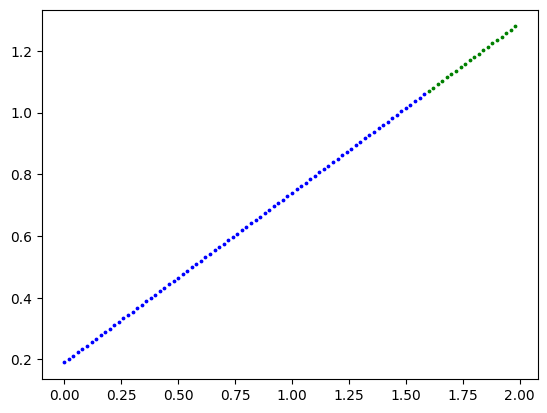

In [82]:
# visualize predictions
plot_predictions(predictions=y_pred)

In [83]:
y_pred

tensor([[1.0767],
        [1.0877],
        [1.0987],
        [1.1097],
        [1.1207],
        [1.1317],
        [1.1427],
        [1.1537],
        [1.1648],
        [1.1758],
        [1.1868],
        [1.1978],
        [1.2088],
        [1.2198],
        [1.2308],
        [1.2418],
        [1.2528],
        [1.2639],
        [1.2749],
        [1.2859]], device='cuda:0')

In [89]:
y_pred_test = torch.tensor(y_pred)

<ipython-input-89-9ea33c85eff0>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_test = torch.tensor(y_pred)


In [90]:
y_pred_test

tensor([[1.0767],
        [1.0877],
        [1.0987],
        [1.1097],
        [1.1207],
        [1.1317],
        [1.1427],
        [1.1537],
        [1.1648],
        [1.1758],
        [1.1868],
        [1.1978],
        [1.2088],
        [1.2198],
        [1.2308],
        [1.2418],
        [1.2528],
        [1.2639],
        [1.2749],
        [1.2859]], device='cuda:0')

In [91]:
y_pred_test_cpu = y_pred_test.detach().cpu().numpy()

In [92]:
y_pred_test_cpu

array([[1.0766606],
       [1.0876719],
       [1.0986832],
       [1.1096945],
       [1.1207058],
       [1.1317171],
       [1.1427283],
       [1.1537396],
       [1.1647508],
       [1.1757622],
       [1.1867734],
       [1.1977847],
       [1.208796 ],
       [1.2198073],
       [1.2308185],
       [1.2418299],
       [1.2528411],
       [1.2638524],
       [1.2748637],
       [1.285875 ]], dtype=float32)

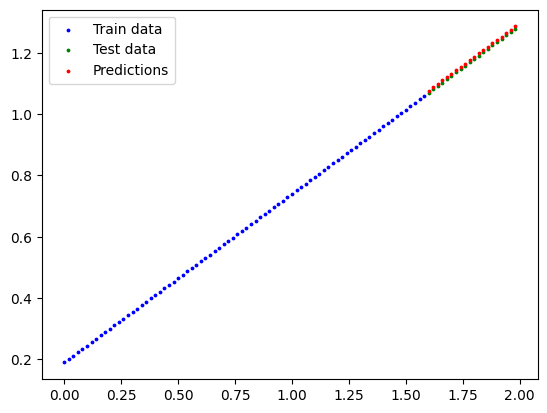

In [93]:
plot_predictions(predictions=y_pred_test_cpu)

In [94]:
# HAHAAAAAAAAAAAAAA YEEEEEESSSSS !!!!